In [2]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [3]:
sp500 = yf.Ticker("AAPL")
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-04 00:00:00-05:00,189.979996,190.050003,187.449997,189.429993,43389500,0.0,0.0
2023-12-05 00:00:00-05:00,190.210007,194.399994,190.179993,193.419998,66628400,0.0,0.0
2023-12-06 00:00:00-05:00,194.449997,194.759995,192.110001,192.320007,41089700,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1980-12-12 00:00:00-05:00', '1980-12-15 00:00:00-05:00',
               '1980-12-16 00:00:00-05:00', '1980-12-17 00:00:00-05:00',
               '1980-12-18 00:00:00-05:00', '1980-12-19 00:00:00-05:00',
               '1980-12-22 00:00:00-05:00', '1980-12-23 00:00:00-05:00',
               '1980-12-24 00:00:00-05:00', '1980-12-26 00:00:00-05:00',
               ...
               '2023-11-27 00:00:00-05:00', '2023-11-28 00:00:00-05:00',
               '2023-11-29 00:00:00-05:00', '2023-11-30 00:00:00-05:00',
               '2023-12-01 00:00:00-05:00', '2023-12-04 00:00:00-05:00',
               '2023-12-05 00:00:00-05:00', '2023-12-06 00:00:00-05:00',
               '2023-12-07 00:00:00-05:00', '2023-12-08 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=10839, freq=None)

<Axes: xlabel='Date'>

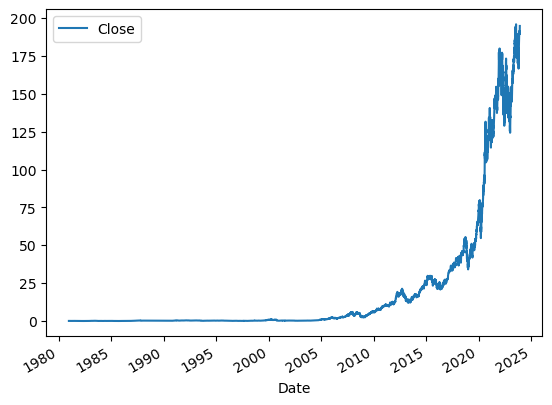

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.094137,0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.087228,0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.089387,1
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.091978,1
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.097592,1
...,...,...,...,...,...,...,...
2023-12-04 00:00:00-05:00,189.979996,190.050003,187.449997,189.429993,43389500,193.419998,1
2023-12-05 00:00:00-05:00,190.210007,194.399994,190.179993,193.419998,66628400,192.320007,0
2023-12-06 00:00:00-05:00,194.449997,194.759995,192.110001,192.320007,41089700,194.270004,1


In [11]:
sp500 = sp500.loc["1990-01-01":].copy()

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.249271,0.265181,0.247503,0.263413,183198400,0.265181,1
1990-01-03 00:00:00-05:00,0.268718,0.268718,0.265181,0.265181,207995200,0.266066,1
1990-01-04 00:00:00-05:00,0.270485,0.274021,0.263414,0.266066,221513600,0.266950,1
1990-01-05 00:00:00-05:00,0.266950,0.270486,0.261646,0.266950,123312000,0.268718,1
1990-01-08 00:00:00-05:00,0.265181,0.268718,0.261646,0.268718,101572800,0.266066,0
...,...,...,...,...,...,...,...
2023-12-04 00:00:00-05:00,189.979996,190.050003,187.449997,189.429993,43389500,193.419998,1
2023-12-05 00:00:00-05:00,190.210007,194.399994,190.179993,193.419998,66628400,192.320007,0
2023-12-06 00:00:00-05:00,194.449997,194.759995,192.110001,192.320007,41089700,194.270004,1


In [14]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
preds = model.predict(test[predictors])

In [16]:
preds = pd.Series(preds, index=test.index)

In [17]:
precision_score(test["Target"], preds)

0.6818181818181818

In [18]:
combined = pd.concat([test["Target"], preds], axis=1)
print(combined)

                           Target  0
Date                                
2023-07-20 00:00:00-04:00       0  0
2023-07-21 00:00:00-04:00       1  0
2023-07-24 00:00:00-04:00       1  0
2023-07-25 00:00:00-04:00       1  0
2023-07-26 00:00:00-04:00       0  0
...                           ... ..
2023-12-04 00:00:00-05:00       1  1
2023-12-05 00:00:00-05:00       0  0
2023-12-06 00:00:00-05:00       1  0
2023-12-07 00:00:00-05:00       1  0
2023-12-08 00:00:00-05:00       0  0

[100 rows x 2 columns]


<Axes: xlabel='Date'>

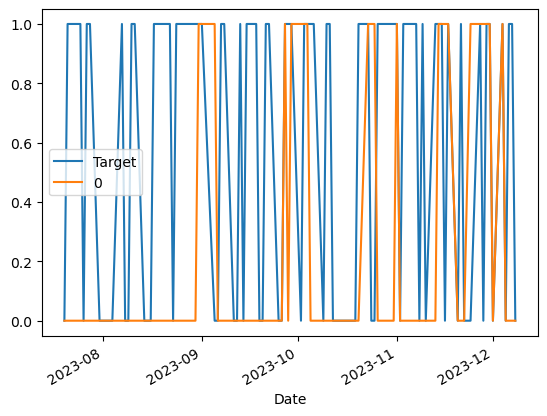

In [19]:
combined.plot()

In [20]:
def predict(train, test,predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [21]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [22]:
predictions = backtest(sp500, model, predictors)

In [23]:
predictions["Predictions"].value_counts()

Predictions
0    4128
1    1923
Name: count, dtype: int64

In [24]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5195007800312013

In [25]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.521897
0    0.478103
Name: count, dtype: float64

In [175]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
  rolling_average = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_average["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [176]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 00:00:00-05:00,4553.040039,4568.430176,4545.049805,4556.620117,3042810000,4559.339844,1,1.002026,1.0,1.005235,4.0,1.043463,33.0,1.082193,128.0,1.158063,530.0
2023-11-24 00:00:00-05:00,4555.839844,4560.310059,4552.799805,4559.339844,1639500000,4550.430176,0,1.000298,2.0,1.003572,4.0,1.043908,33.0,1.082290,129.0,1.158328,530.0
2023-11-27 00:00:00-05:00,4554.859863,4560.520020,4546.319824,4550.430176,3403990000,4554.890137,1,0.999022,1.0,1.000008,3.0,1.041698,33.0,1.079574,129.0,1.155644,529.0


In [177]:
sp500 = sp500.dropna()

In [178]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-21 00:00:00-05:00,4538.770020,4542.140137,4525.509766,4538.189941,3511080000,4556.620117,1,0.998989,1.0,1.003549,4.0,1.039476,33.0,1.078358,128.0,1.153808,529.0
2023-11-22 00:00:00-05:00,4553.040039,4568.430176,4545.049805,4556.620117,3042810000,4559.339844,1,1.002026,1.0,1.005235,4.0,1.043463,33.0,1.082193,128.0,1.158063,530.0
2023-11-24 00:00:00-05:00,4555.839844,4560.310059,4552.799805,4559.339844,1639500000,4550.430176,0,1.000298,2.0,1.003572,4.0,1.043908,33.0,1.082290,129.0,1.158328,530.0


In [179]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [180]:
def predict(train, test,predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [184]:
predictions = backtest(sp500, model, new_predictors)

In [185]:
predictions["Predictions"].value_counts()

0.0    4216
1.0     827
Name: Predictions, dtype: int64

In [186]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5719467956469165